In [105]:
import pandas as pd
import numpy as np

In [106]:
data = pd.read_csv('../datasets/movie_metadata.csv')

In [107]:
data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [108]:
data.shape

(5043, 28)

In [109]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

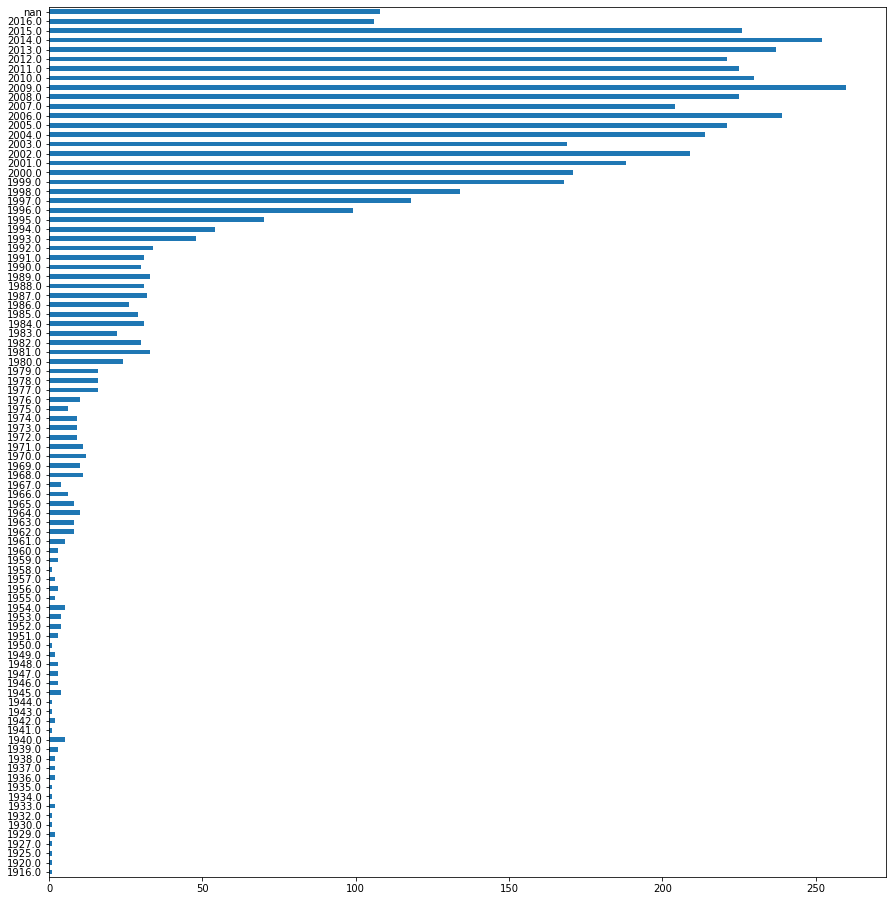

In [110]:
# we have movies only upto 2016
import matplotlib.pyplot as plt
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [111]:
# recommendation will be based on these features only
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title','title_year']]

In [112]:
data.head(10)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,title_year
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,2009.0
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,2007.0
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,2015.0
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,2012.0
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter,2012.0
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,Spider-Man 3,2007.0
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled,2010.0
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,Avengers: Age of Ultron,2015.0
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince,2009.0


In [113]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [114]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,title_year
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,2009.0
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,2007.0
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,2015.0
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,2012.0
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered,2013.0
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following,NaN
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant,2013.0
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling,2012.0


In [115]:
data['genres'] = data['genres'].str.replace('|', ' ')

/var/folders/8p/44mq6_9n6sl5sg2z924w6wkm0000gq/T/ipykernel_76083/3923011829.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['genres'] = data['genres'].str.replace('|', ' ')


In [116]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,title_year
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar,2009.0
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End,2007.0
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre,2015.0
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises,2012.0
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,Signed Sealed Delivered,2013.0
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,The Following,NaN
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,A Plague So Pleasant,2013.0
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,Shanghai Calling,2012.0


In [117]:
data['movie_title'] = data['movie_title'].str.lower()

In [127]:
# null terminating char at the end
data['movie_title'].str.strip()[1]

"pirates of the caribbean: at world's end"

In [128]:
# removing the null terminating char at the end
data['movie_title'] = data['movie_title'].str.strip()

In [129]:
data['movie_title'][1]

"pirates of the caribbean: at world's end"

In [130]:
data.rename(columns={"title_year":"year"},inplace=True)

In [26]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb(api_key='24a3062e32228f2015236a5f3597ca84')
# tmdb.api_key = '24a3062e32228f2015236a5f3597ca84'

In [170]:
def int_year(x):
    try:return int(x)
    except:return -99999

def get_details(x):
    try:
        year=x.release_date[:4]
    except:
        year=-99999
    return {"id":x.id,"title":x.title.lower(),"year":year}

def first_movie(x):
    df=pd.DataFrame(map(get_details,tmdb.search(x)))
    return df.iloc[0]

def movie_by_year(x,year):
    search_df=pd.DataFrame(map(get_details,tmdb.search(x)))
    search_df['year_diff']=search_df['year'].apply(lambda y:abs(int_year(y)-year))
    try:
        search_df=search_df.query("`title`==\"{}\"".format(x)).sort_values("year_diff",ascending=True)
    except:
        search_df=search_df
    return search_df.iloc[0]
    
def get_id(x):
    x=x.to_dict()
    x,year=x['movie_title'],x['year']
    print(x,year)
    try:
        if pd.isna(year):
            mid=first_movie(x)["id"]
            print(mid)
            return mid
        else:
            mid=movie_by_year(x,year)["id"]
            print(mid)
            return mid
    except:
        print("not found")
        return None

In [171]:
data['id']=data[['movie_title','year']].apply(get_id,axis=1)

avatar 2009.0
19995
pirates of the caribbean: at world's end 2007.0
285
spectre 2015.0
206647
the dark knight rises 2012.0
49026
star wars: episode vii - the force awakens nan
140607
john carter 2012.0
49529
spider-man 3 2007.0
559
tangled 2010.0
38757
avengers: age of ultron 2015.0
99861
harry potter and the half-blood prince 2009.0
767
batman v superman: dawn of justice 2016.0
209112
superman returns 2006.0
1452
quantum of solace 2008.0
10764
pirates of the caribbean: dead man's chest 2006.0
58
the lone ranger 2013.0
57201
man of steel 2013.0
49521
the chronicles of narnia: prince caspian 2008.0
2454
the avengers 2012.0
24428
pirates of the caribbean: on stranger tides 2011.0
1865
men in black 3 2012.0
41154
the hobbit: the battle of the five armies 2014.0
122917
the amazing spider-man 2012.0
1930
robin hood 2010.0
20662
the hobbit: the desolation of smaug 2013.0
57158
the golden compass 2007.0
2268
king kong 2005.0
254
titanic 1997.0
597
captain america: civil war 2016.0
271110
batt

308531
fantastic four 2015.0
166424
night at the museum 2006.0
1593
san andreas 2015.0
254128
tomorrow never dies 1997.0
714
the patriot 2000.0
2024
ocean's twelve 2004.0
163
mr. & mrs. smith 2005.0
787
insurgent 2015.0
262500
the aviator 2004.0
2567
gulliver's travels 2010.0
38745
the green hornet 2011.0
40805
the a-team nan
34544
300: rise of an empire 2014.0
53182
the smurfs 2011.0
41513
home on the range 2004.0
13700
allegiant 2016.0
262504
real steel 2011.0
39254
the smurfs 2 2013.0
77931
speed 2: cruise control 1997.0
1639
ender's game 2013.0
80274
live free or die hard 2007.0
1571
the lord of the rings: the fellowship of the ring 2001.0
120
around the world in 80 days 2004.0
10204
ali 2001.0
8489
the cat in the hat 2003.0
10588
i, robot 2004.0
2048
kingdom of heaven 2005.0
1495
stuart little 1999.0
10137
the princess and the frog 2009.0
10198
the martian 2015.0
286217
10,000 b.c. nan
106213
the island 2005.0
1635
town & country 2001.0
24113
gone in sixty seconds 2000.0
9679
glad

953
children of men 2006.0
9693
x-men 2000.0
36657
wanted 2008.0
8909
the rock 1996.0
9802
ice age: the meltdown 2006.0
950
50 first dates 2004.0
1824
hairspray 2007.0
2976
exorcist: the beginning 2004.0
11026
inspector gadget 1999.0
332
now you see me 2013.0
75656
grown ups 2010.0
38365
the terminal 2004.0
594
constantine nan
561
hotel for dogs 2009.0
15189
vertical limit 2000.0
11678
charlie wilson's war 2007.0
6538
shark tale 2004.0
10555
dreamgirls 2006.0
1125
life nan
9487
be cool 2005.0
4551
munich 2005.0
612
tears of the sun 2003.0
9567
killers 2010.0
37821
the man from u.n.c.l.e. 2015.0
203801
spanglish 2004.0
2539
monster house 2006.0
9297
bandits 2001.0
3172
first knight 1995.0
6520
anna and the king 1999.0
1439
immortals 2011.0
37958
hostage 2005.0
2026
titan a.e. 2000.0
7450
hollywood homicide 2003.0
11375
soldier 1998.0
9425
carriers 2009.0
25769
monkeybone 2001.0
23685
flight of the phoenix 2004.0
11866
unbreakable 2000.0
9741
minions 2015.0
211672
sucker punch 2011.0
236

116741
resident evil: afterlife 2010.0
35791
red tails 2012.0
72431
sex and the city nan
4564
the devil's advocate 1997.0
1813
that's my boy 2012.0
87428
dragonheart 1996.0
8840
after the sunset 2004.0
10589
ghost rider: spirit of vengeance 2011.0
71676
captain corelli's mandolin 2001.0
1722
anger management nan
9506
the pacifier 2005.0
10022
walking tall 2004.0
11358
forrest gump 1994.0
13
alvin and the chipmunks 2007.0
6477
meet the parents 2000.0
1597
pocahontas 1995.0
10530
superman 1978.0
1924
the nutty professor 1996.0
9327
hitch 2005.0
8488
george of the jungle 1997.0
10603
american wedding 2003.0
8273
captain phillips 2013.0
109424
date night 2010.0
35056
casper 1995.0
8839
the equalizer 2014.0
156022
maid in manhattan 2002.0
7303
crimson tide 1995.0
8963
the pursuit of happyness 2006.0
1402
flightplan 2005.0
9315
disclosure 1994.0
8984
city of angels 1998.0
795
kill bill: vol. 1 2003.0
24
bowfinger 1999.0
11353
stargate sg-1 nan
784993
kill bill: vol. 2 2004.0
393
tango & cash

9625
multiplicity 1996.0
9304
aliens in the attic 2009.0
20856
the pledge 2001.0
5955
the producers 2005.0
9899
dredd 2012.0
49049
the phantom 1996.0
9826
all the pretty horses 2000.0
21355
nixon 1995.0
10858
the ghost writer 2010.0
11439
deep rising 1998.0
9457
miracle at st. anna 2008.0
12412
curse of the golden flower 2006.0
1494
bangkok dangerous 2008.0
13184
big trouble 2002.0
2185
love in the time of cholera 2007.0
6639
the returned nan
227094
shadow conspiracy 1997.0
38153
johnny english reborn 2011.0
58233
foodfight! 2012.0
116977
argo 2012.0
68734
the fugitive 1993.0
5503
the bounty hunter 2010.0
27573
sleepers 1996.0
819
rambo: first blood part ii 1985.0
1369
the juror 1996.0
9623
pinocchio 1940.0
10895
heaven's gate 1980.0
10935
underworld: evolution 2006.0
834
victor frankenstein 2015.0
228066
finding forrester 2000.0
711
28 days 2000.0
10468
unleashed 2005.0
10027
the sweetest thing 2002.0
11812
the firm 1993.0
37233
charlie st. cloud 2010.0
37950
the mechanic 2011.0
27582

109431
cape fear 1991.0
1598
21 2008.0
8065
trainwreck 2015.0
271718
guess who 2005.0
11638
the english patient 1996.0
409
l.a. confidential 1997.0
2118
sky high 2005.0
11459
in & out 1997.0
10806
species 1995.0
9348
a nightmare on elm street 1984.0
377
the cell 2000.0
8843
the man in the iron mask 1998.0
9313
secretariat 2010.0
39486
tmnt 2007.0
1273
radio 2003.0
13920
friends with benefits 2011.0
50544
neighbors 2: sorority rising 2016.0
325133
saving mr. banks 2013.0
140823
malcolm x 1992.0
1883
this is 40 2012.0
89492
old dogs 2009.0
22949
underworld: rise of the lycans 2009.0
12437
license to wed 2007.0
2959
the benchwarmers 2006.0
9957
must love dogs 2005.0
11648
donnie brasco 1997.0
9366
resident evil 2002.0
1576
poltergeist 1982.0
609
the ladykillers 2004.0
5516
max payne 2008.0
13051
in time 2011.0
49530
the back-up plan 2010.0
34806
something borrowed 2011.0
49022
hit the floor nan
not found
black knight 2001.0
11469
the bad news bears 1976.0
23479
street fighter 1994.0
11667

not found
the last stand 2013.0
76640
godsend 2004.0
11058
chasing liberty 2004.0
14844
hoodwinked too! hood vs. evil 2011.0
57089
an unfinished life 2005.0
1947
the imaginarium of doctor parnassus 2009.0
8054
barney's version 2010.0
46829
trapped nan
9039
runner runner 2013.0
146238
antitrust 2001.0
9989
glory 1989.0
9665
once upon a time in america 1984.0
311
dead man down 2013.0
102362
the merchant of venice 2004.0
11162
the good thief 2002.0
6016
supercross 2005.0
17186
miss potter 2006.0
13967
the promise 2005.0
87155
doa: dead or alive 2006.0
9053
the assassination of jesse james by the coward robert ford 2007.0
4512
1911 2011.0
76349
little nicholas 2009.0
31203
wild card 2015.0
265208
machine gun preacher 2011.0
45610
animals united 2010.0
50135
the color of freedom 2007.0
not found
united passions 2014.0
271331
grace of monaco 2014.0
215211
a warrior's tail 2015.0
not found
ripley's game 2002.0
10955
sausage party 2016.0
223702
pitch perfect 2 2015.0
254470
walk the line 2005.

133698
warrior 2011.0
59440
michael collins 1996.0
1770
gettysburg 1993.0
10655
stop-loss 2008.0
8988
abandon 2002.0
15992
brokedown palace 1999.0
17707
the possession 2012.0
77883
mrs. winterbourne 1996.0
40001
straw dogs 2011.0
64639
the hoax 2006.0
9903
stone cold 1991.0
21338
the road 2009.0
20766
sheena 1984.0
24264
underclassman 2005.0
19803
say it isn't so 2001.0
20309
the world's fastest indian 2005.0
9912
snakes on a plane 2006.0
326
tank girl 1995.0
9067
king's ransom 2005.0
27360
blindness 2008.0
8338
bloodrayne 2005.0
168705
carnage 2011.0
72113
where the truth lies 2005.0
9729
cirque du soleil: worlds away 2012.0
94352
without limits 1998.0
22256
me and orson welles 2008.0
12404
the best offer 2013.0
152742
bad lieutenant: port of call new orleans 2009.0
not found
a turtle's tale: sammy's adventures 2010.0
49953
little white lies 2010.0
48034
love ranch 2010.0
39845
the true story of puss'n boots 2009.0
900182
space dogs 2010.0
36696
the counselor 2013.0
109091
ironclad 20

9582
loser 2000.0
10642
capitalism: a love story 2009.0
22074
the greatest story ever told 1965.0
2428
secret in their eyes 2015.0
290751
disaster movie 2008.0
13805
armored 2009.0
4597
the man who knew too little 1997.0
9414
what's your number? 2011.0
63492
lockout 2012.0
81796
envy 2004.0
10710
crank: high voltage 2009.0
15092
bullets over broadway 1994.0
11382
one night with the king 2006.0
15005
the quiet american 2002.0
8198
the weather man 2005.0
6963
undisputed 2002.0
15070
ghost town 2008.0
12797
12 rounds 2009.0
17134
let me in 2010.0
41402
3 ninjas kick back 1994.0
18885
be kind rewind 2008.0
4953
mrs henderson presents 2005.0
not found
triple 9 2016.0
146198
deconstructing harry 1997.0
2639
three to tango 1999.0
10563
burnt 2015.0
295964
we're no angels 1989.0
5971
everyone says i love you 1996.0
9716
death at a funeral 2007.0
2196
death sentence 2007.0
11835
everybody's fine 2009.0
26171
superbabies: baby geniuses 2 2004.0
31117
the man 2005.0
9074
code name: the cleaner 20

9285
varsity blues 1999.0
14709
the artist 2011.0
74643
the unborn 2009.0
13788
moonrise kingdom 2012.0
83666
the texas chainsaw massacre: the beginning 2006.0
10781
the young messiah 2016.0
318850
the master of disguise 2002.0
13908
pan's labyrinth 2006.0
1417
the messengers nan
9966
see spot run 2001.0
39180
baby boy 2001.0
16161
the roommate 2011.0
49950
joe dirt 2001.0
10956
double impact 1991.0
9594
hot fuzz 2007.0
4638
the women 2008.0
13972
vicky cristina barcelona 2008.0
5038
arn: the knight templar 2007.0
13491
bad moms 2016.0
376659
boys and girls 2000.0
10571
white oleander 2002.0
10994
jennifer's body 2009.0
19994
drowning mona 2000.0
25166
radio days 1987.0
30890
left behind 2014.0
218043
remember me 2010.0
23169
how to deal 2003.0
17403
my stepmother is an alien 1988.0
12120
philadelphia 1993.0
9800
the thirteenth floor 1999.0
1090
the cookout 2004.0
18475
meteor 1979.0
40160
duets 2000.0
18074
hollywood ending 2002.0
9689
detroit rock city 1999.0
9781
highlander 1986.0
8

1913
under the skin 2013.0
698232
good morning, vietnam 1987.0
801
the last godfather 2010.0
70829
justin bieber: never say never 2011.0
54518
black swan 2010.0
44214
robocop 2014.0
97020
the godfather: part ii 1974.0
not found
save the last dance 2001.0
9816
a nightmare on elm street 4: the dream master 1988.0
10131
miracles from heaven 2016.0
339984
dude, where's my car? 2000.0
8859
young guns 1988.0
11967
st. vincent 2014.0
239563
about last night 2014.0
222899
10 things i hate about you 1999.0
4951
the new guy 2002.0
10985
loaded weapon 1 1993.0
not found
the shallows 2016.0
332567
the butterfly effect 2004.0
1954
snow day 2000.0
15489
this christmas 2007.0
15250
baby geniuses 1999.0
22345
the big hit 1998.0
9448
harriet the spy 1996.0
38223
child's play 2 1990.0
11186
no good deed 2014.0
136835
the mist 2007.0
5876
ex machina 2015.0
264660
being john malkovich 1999.0
492
two can play that game 2001.0
25462
earth to echo 2014.0
238603
crazy/beautiful 2001.0
10691
letters from iwo j

10426
insidious: chapter 3 2015.0
280092
the last dragon 1985.0
13938
snatch 2000.0
107
the lawnmower man 1992.0
10163
nick and norah's infinite playlist 2008.0
12182
dogma 1999.0
1832
the banger sisters 2002.0
9034
twilight zone: the movie 1983.0
15301
road house 1989.0
10135
a low down dirty shame 1994.0
26352
swimfan 2002.0
20616
employee of the month 2006.0
9794
can't hardly wait 1998.0
15037
the outsiders 1983.0
227
pete's dragon 2016.0
294272
the dead zone 1983.0
11336
sinister 2 2015.0
283445
sparkle 2012.0
88036
valentine 2001.0
10984
the fourth kind 2009.0
22824
a prairie home companion 2006.0
9526
sugar hill 1993.0
39349
invasion u.s.a. 1985.0
15983
roll bounce 2005.0
14544
rushmore 1998.0
11545
skyline 2010.0
42684
the second best exotic marigold hotel 2015.0
268238
kit kittredge: an american girl 2008.0
8359
the perfect man 2005.0
15648
mo' better blues 1990.0
41823
kung pow: enter the fist 2002.0
11891
tremors 1990.0
9362
wrong turn 2003.0
9902
the long riders 1980.0
14729

13154
clay pigeons 1998.0
26618
it's kind of a funny story 2010.0
43923
made in dagenham 2010.0
46138
when did you last see your father? 2007.0
45791
prefontaine 1997.0
26306
the wicked lady 1983.0
110683
the secret of kells 2009.0
26963
begin again 2013.0
198277
down in the valley 2005.0
7870
brooklyn rules 2007.0
13072
restless 2012.0
47760
the singing detective 2003.0
30141
the land girls 1998.0
17044
fido 2006.0
10288
the wendell baker story 2005.0
12183
wild target 2010.0
44147
pathology 2008.0
12192
wuthering heights nan
25095
10th & wolf 2006.0
13197
dear wendy 2004.0
10913
aloft 2014.0
251321
akira 1988.0
149
the death and life of bobby z 2007.0
10425
the rocket: the legend of rocket richard 2005.0
49081
swelter 2014.0
256687
my lucky star 2013.0
220488
imagine me & you 2005.0
1544
mr. church 2016.0
374461
swimming pool 2003.0
302
green street 3: never back down 2013.0
not found
the blood of heroes 1989.0
21512
code of honor 2016.0
389425
driving miss daisy 1989.0
403
soul food

25248
miss julie 2014.0
230266
somewhere in time 1980.0
16633
dum maaro dum 2011.0
63006
insidious: chapter 2 2013.0
91586
saw ii 2005.0
215
10 cloverfield lane 2016.0
333371
jackass: the movie 2002.0
9012
lights out 2016.0
345911
paranormal activity 3 2011.0
72571
ouija 2014.0
242512
a nightmare on elm street 3: dream warriors 1987.0
10072
the gift 2015.0
328425
instructions not included 2013.0
211954
paranormal activity 4 2012.0
82990
the robe 1953.0
29912
the return of the pink panther 1975.0
11843
freddy's dead: the final nightmare 1991.0
11284
monster 2003.0
504
20,000 leagues under the sea 1954.0
173
paranormal activity: the marked ones 2014.0
227348
the elephant man 1980.0
1955
dallas buyers club 2013.0
152532
the lazarus effect 2015.0
243940
memento 2000.0
77
oculus 2013.0
157547
clerks ii 2006.0
2295
billy elliot 2000.0
71
the way way back 2013.0
147773
house party 2 1991.0
16096
the man from snowy river 1982.0
24266
doug's 1st movie 1999.0
16508
the apostle 1997.0
2895
mommie

44953
annie get your gun 1950.0
25209
four lions 2010.0
37495
house of sand 2005.0
748639
defendor 2009.0
34769
the pirate 1948.0
35032
the good heart 2009.0
5178
the history boys 2006.0
8618
unknown 2011.0
48138
m*a*s*h nan
651
midnight cowboy 1969.0
3116
the full monty 1997.0
9427
airplane! 1980.0
813
chain of command 2015.0
352978
friday 1995.0
10634
menace ii society 1993.0
9516
empire nan
169209
creepshow 2 1987.0
16288
the ballad of cable hogue 1970.0
23330
in cold blood 1967.0
18900
the nun's story 1959.0
27029
harper 1966.0
26268
frenzy 1972.0
573
the witch 2015.0
310131
i got the hook up 1998.0
not found
she's the one 1996.0
11363
gods and monsters 1998.0
3033
the secret in their eyes 2009.0
25376
day of the dead 1985.0
8408
train 2008.0
22007
evil dead ii 1987.0
765
pootie tang 2001.0
10615
sharknado 2013.0
205321
la otra conquista 1998.0
not found
trollhunter 2010.0
not found
ira & abby 2006.0
38007
the watch 2012.0
80035
winter passing 2005.0
14256
d.e.b.s. 2004.0
540
the m

595
mad max 2: the road warrior 1981.0
not found
the legend of drunken master 1994.0
12207
lolita 1962.0
802
boys don't cry 1999.0
226
silent house 2011.0
92182
the lives of others 2006.0
582
courageous 2011.0
72213
the hustler 1961.0
990
boom town 1940.0
55604
the triplets of belleville 2003.0
9662
smoke signals 1998.0
20862
american splendor 2003.0
2771
before sunset 2004.0
80
amores perros 2000.0
55
thirteen 2003.0
11023
gentleman's agreement 1947.0
33667
winter's bone 2010.0
39013
touching the void 2003.0
11194
alexander's ragtime band 1938.0
43839
me and you and everyone we know 2005.0
1382
inside job 2010.0
44639
we are your friends 2015.0
301351
ghost dog: the way of the samurai 1999.0
4816
harsh times 2005.0
7873
captive 2015.0
331190
full frontal 2002.0
15186
witchboard 1986.0
17994
strangers with candy nan
13141
hamlet 1996.0
10549
shortbus 2006.0
1378
waltz with bashir 2008.0
8885
the book of mormon movie, volume 1: the journey 2003.0
48382
no end in sight 2007.0
12901
the d

39895
sex with strangers 2002.0
102840
dracula: pages from a virgin's diary 2002.0
55616
faith like potatoes 2006.0
29697
beyond the black rainbow 2010.0
50037
the raid: redemption 2011.0
not found
the dead undead 2010.0
53502
the vatican exorcisms 2013.0
202604
casablanca 1942.0
289
lake mungo 2008.0
27374
rocket singh: salesman of the year 2009.0
26815
silent running 1972.0
811
rocky 1976.0
1366
the sleepwalker 2014.0
244776
the fog 1980.0
790
tom jones 1963.0
5769
unfriended 2014.0
277685
taxi driver 1976.0
103
the howling 1981.0
11298
dr. no 1962.0
646
chernobyl diaries 2012.0
93856
hellraiser 1987.0
9003
god's not dead 2 2016.0
347126
cry_wolf 2005.0
10092
godzilla 2000 1999.0
not found
blue valentine 2010.0
46705
transamerica 2005.0
546
the devil inside 2012.0
76487
beyond the valley of the dolls 1970.0
5722
love me tender 1956.0
39833
an inconvenient truth 2006.0
1781
sands of iwo jima 1949.0
18712
shine a light 2008.0
7944
the green inferno 2013.0
171424
departure 2015.0
361475

308467
napoleon dynamite 2004.0
8193
blue ruin 2013.0
188166
paranormal activity 2007.0
23827
dogtown and z-boys 2001.0
1282
monty python and the holy grail 1975.0
762
quinceañera 2006.0
64499
gory gory hallelujah 2003.0
281189
heroes nan
615677
tarnation 2003.0
1435
i want your money 2010.0
47546
love in the time of monsters 2014.0
189711
the beyond 1981.0
449575
home movies nan
6984
what happens in vegas 2008.0
9029
the dark hours 2005.0
18045
my beautiful laundrette 1985.0
11240
fabled 2002.0
43743
show me 2004.0
157909
cries & whispers 1972.0
not found
intolerance: love's struggle throughout the ages 1916.0
3059
trekkies 1997.0
15800
the broadway melody 1929.0
65203
the evil dead 1981.0
764
maniac 2012.0
103620
censored voices 2015.0
319069
murderball 2005.0
14278
american ninja 2: the confrontation 1987.0
25678
51 birch street 2005.0
79161
revolution nan
85446
rotor dr1 2015.0
371690
halloween 1978.0
948
12 angry men 1957.0
389
my dog tulip 2009.0
52032
it happened one night 1934.

In [175]:
data['id']=data['id'].replace(np.nan,0).astype(int)

In [246]:
def set_id(rowno):
    title=data['movie_title'][rowno]
    print(title)
    data['id'][rowno]=first_movie(title)["id"]
for i in data[data['id']==0].index:
    set_id(i)

In [240]:
data=data[data['id']!=0]

In [242]:
data=data.drop_duplicates(subset=['id'],keep='last')

In [243]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,year,id
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,2009.0,19995
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,2007.0,285
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,2015.0,206647
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,2012.0,49026
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,NaN,140607
...,...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered,2013.0,231617
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following,NaN,46495
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant,2013.0,365441
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling,2012.0,126186


In [244]:
data.to_csv('../datasets/data.csv',index=False)